# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Novan
- **Email:** novan7v@gmail.com
- **ID Dicoding:** novantares

## Menentukan Pertanyaan Bisnis

- Siapa pelanggan paling bernilai dan bagaimana segmentasinya?
- Wilayah mana yang menghasilkan revenue terbesar dan bagaimana distribusinya?

## Import Semua Packages/Library yang Digunakan

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [100]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [101]:
order_item_df = pd.read_csv("order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [102]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset yang digunakan terdiri dari customers, orders, dan order items, yang masing-masing berisi informasi pelanggan, detail pesanan, serta rincian nilai transaksi. Setelah data dimuat, dilakukan pengecekan awal menggunakan .head() untuk memastikan struktur kolom dan format data sudah sesuai sebelum masuk ke tahap pengolahan lebih lanjut.

### Assessing Data

In [103]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [104]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [105]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [106]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Dataset terdiri dari 99.441 baris dan 5 kolom dengan tipe data yang sesuai, yaitu satu kolom numerik (customer_zip_code_prefix) dan empat kolom bertipe objek. Tidak ditemukan nilai kosong (non-null seluruhnya), sehingga dataset dalam kondisi lengkap dan siap digunakan untuk proses penggabungan data serta analisis wilayah berdasarkan customer_state.
- Pengecekan nilai kosong menunjukkan bahwa seluruh kolom pada dataset customers tidak memiliki missing values. Data dalam kondisi lengkap dan siap digunakan untuk analisis selanjutnya.
- Hasil pengecekan menunjukkan tidak terdapat data duplikat pada dataset customers, sehingga setiap baris data bersifat unik dan valid

In [107]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [108]:
order_item_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [109]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


In [110]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Dataset order_items terdiri dari 112.650 baris dan 7 kolom, dengan tipe data numerik pada price dan freight_value, serta beberapa kolom bertipe objek. Seluruh kolom memiliki jumlah data non-null yang lengkap, sehingga dataset siap digunakan untuk analisis nilai transaksi dan perhitungan revenue.
- Pengecekan nilai kosong menunjukkan bahwa seluruh kolom pada dataset order_item tidak memiliki missing values.
- Hasil pengecekan menunjukkan tidak terdapat data duplikat pada dataset order_item, sehingga setiap baris data bersifat unik dan valid.
- Statistik deskriptif menunjukkan bahwa rata-rata harga produk sebesar 120,65 dan rata-rata biaya pengiriman sebesar 19,99. Nilai maksimum harga mencapai 6.735, yang mengindikasikan adanya transaksi bernilai tinggi. Distribusi data terlihat cukup menyebar dengan perbedaan signifikan antara nilai minimum dan maksimum, sehingga berpotensi menghasilkan distribusi revenue yang tidak merata.

In [111]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [112]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [113]:
orders_df.duplicated().sum()

np.int64(0)

In [114]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Dataset orders terdiri dari 99.441 baris dan 8 kolom yang seluruhnya bertipe objek. Terdapat beberapa kolom dengan nilai kosong, terutama pada tanggal persetujuan dan pengiriman, yang kemungkinan disebabkan oleh status pesanan tertentu.
- Hasil pengecekan menunjukkan terdapat beberapa nilai kosong pada kolom terkait proses pengiriman, seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Nilai kosong ini kemungkinan disebabkan oleh pesanan yang belum selesai atau dibatalkan.
- Hasil pengecekan menunjukkan tidak terdapat data duplikat pada dataset orders, sehingga setiap baris data bersifat unik dan valid
- Statistik deskriptif menunjukkan bahwa setiap order_id dan customer_id bersifat unik dengan total 99.441 transaksi. Mayoritas pesanan memiliki status delivered, yang menandakan sebagian besar transaksi berhasil diselesaikan.

### Cleaning Data

In [115]:
customers_df.drop(columns=['customer_unique_id', 'customer_zip_code_prefix', 'customer_city'], inplace=True)
customers_df.head(5)

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


**Insight:**
- Pada tahap ini dilakukan penghapusan beberapa kolom yang tidak digunakan dalam analisis. Langkah ini bertujuan untuk menyederhanakan dataset serta mengurangi penggunaan memori, sehingga hanya menyisakan informasi yang relevan seperti customer_id dan customer_state untuk analisis wilayah dan penggabungan data.

In [116]:
order_item_df.drop(columns=['order_item_id', 'product_id', 'seller_id', 'shipping_limit_date'], inplace=True)
order_item_df.head()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


**Insight:**
- Dilakukan penghapusan kolom yang tidak relevan dengan tujuan analisis untuk menyederhanakan dataset dan memfokuskan analisis pada komponen utama transaksi

In [117]:
orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_status', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)
orders_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [118]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


**Insight:**
- dilakukan penghapusan beberapa kolom yang tidak digunakan dalam RFM analysis. Langkah ini juga membantu menyederhanakan struktur data dan mengoptimalkan penggunaan memori.
- Kolom order_purchase_timestamp dikonversi ke tipe data datetime menggunakan pd.to_datetime() agar dapat digunakan dalam analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore `customer_df`

In [119]:
customers_df.sample(5)

,customer_id,customer_state
17172,4287c1f1d8f1e9d829096f515a9c15fd,CE
38724,cc4f268918146f839fd6d93f92f20141,PE
97935,031de3e0ed7da3e56d64bc3099f70342,RJ
8138,5daf8a84ec87f4988b337626369c4dba,GO
62585,9f74f559f6013fc7c526c3333c7ebc2b,SP


In [120]:
customers_df.groupby(by='customer_state').agg({
    "customer_id": "count"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Dilakukan pengelompokan data berdasarkan customer_state untuk melihat jumlah pelanggan di setiap wilayah. Hasil menunjukkan bahwa state SP memiliki jumlah pelanggan terbanyak, diikuti oleh RJ dan MG. Hal ini mengindikasikan adanya konsentrasi pelanggan yang tinggi pada beberapa wilayah tertentu, yang berpotensi memengaruhi distribusi transaksi dan total revenue secara geografis.

### Explore `orders_df`

In [121]:
orders_df.sample(5)

,order_id,customer_id,order_purchase_timestamp
24978,8c58b2a5e9f75210cd15eae77b7441f4,58299a6c7b64a6a0fa2f6f5d463fe108,2017-09-01 03:53:31
14753,f0c8f501afe22bb7a23e3721bcc6221c,aca18b64dfc4ffb2db3fe697768b37b2,2018-01-23 12:22:00
22505,f4fdb235ce7c1f7d3eb1b2fdd3a4f610,841583c9439180dd784a95ad9498e34a,2017-10-27 12:50:10
57105,80aa9c31556571f08988f12dc07476e1,ad4316eb148e96ac9e3e8ca82cd92717,2018-07-11 11:35:15
73234,5ded9a59e8920225f45b1d0e11dc7d97,807ef2b1870358b473e99027f30f2064,2017-04-28 15:39:24


In [122]:
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month

monthly_orders = (orders_df.groupby(['year', 'month']).agg(total_orders=('order_id', 'count')).reset_index())

monthly_orders['year_month'] = (
    monthly_orders['year'].astype(str) + '-' +
    monthly_orders['month'].astype(str)
)

monthly_orders

,year,month,total_orders,year_month
0,2016,9,4,2016-9
1,2016,10,324,2016-10
2,2016,12,1,2016-12
3,2017,1,800,2017-1
4,2017,2,1780,2017-2
5,2017,3,2682,2017-3
6,2017,4,2404,2017-4
7,2017,5,3700,2017-5
8,2017,6,3245,2017-6
9,2017,7,4026,2017-7


**Insight:**
- Dilakukan ekstraksi tahun dan bulan dari order_purchase_timestamp untuk menganalisis tren jumlah transaksi per periode waktu. Hasil agregasi menunjukkan adanya peningkatan signifikan jumlah pesanan sepanjang tahun 2017 hingga mencapai puncaknya pada November 2017 dan awal 2018. Pola ini mengindikasikan adanya pertumbuhan aktivitas transaksi serta kemungkinan pengaruh musim atau periode promosi tertentu terhadap peningkatan penjualan.

### Explore `order_item_df`

In [123]:
order_item_df["total_order_value"] = order_item_df["price"] + order_item_df["freight_value"]
order_item_df.head()

,order_id,price,freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [124]:
total_revenue = order_item_df['total_order_value'].sum()
avg_order_value = order_item_df['total_order_value'].mean()
median_order_value = order_item_df['total_order_value'].median()

print("Total Revenue:", total_revenue)
print("Average Order Value:", avg_order_value)
print("Median Order Value:", median_order_value)

Total Revenue: 15843553.24
Average Order Value: 140.6440589436307
Median Order Value: 92.32000000000001


**Insight:**
- dibuat kolom baru total_order_value yang merupakan penjumlahan antara price dan freight_value.
- Perhitungan menunjukkan bahwa total revenue yang dihasilkan mencapai 15,84 juta, dengan rata-rata nilai transaksi sebesar 140,64 dan median sebesar 92,32. Perbedaan antara rata-rata dan median mengindikasikan distribusi transaksi yang cenderung tidak merata (right-skewed), di mana terdapat sejumlah transaksi bernilai tinggi yang meningkatkan nilai rata-rata secara signifikan.

### Explore all data

In [125]:
orders_items_df = pd.merge(
    left=orders_df,
    right=order_item_df,
    how='inner',
    on='order_id'
)

main_data = pd.merge(
    left=orders_items_df,
    right=customers_df,
    how='inner',
    on='customer_id'
)

main_data.head()

,order_id,customer_id,order_purchase_timestamp,year,month,price,freight_value,total_order_value,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,29.99,8.72,38.71,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,118.70,22.76,141.46,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018,8,159.90,19.22,179.12,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017,11,45.00,27.20,72.20,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018,2,19.90,8.72,28.62,SP


In [126]:
print("Shape of main_data:", main_data.shape)
main_data.info()
main_data.describe(include='all')

Shape of main_data: (112650, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   customer_id               112650 non-null  object        
 2   order_purchase_timestamp  112650 non-null  datetime64[ns]
 3   year                      112650 non-null  int32         
 4   month                     112650 non-null  int32         
 5   price                     112650 non-null  float64       
 6   freight_value             112650 non-null  float64       
 7   total_order_value         112650 non-null  float64       
 8   customer_state            112650 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(3)
memory usage: 6.9+ MB


,order_id,customer_id,order_purchase_timestamp,year,month,price,freight_value,total_order_value,customer_state
count,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650
unique,98666,98666,NaN,NaN,NaN,NaN,NaN,NaN,27
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,21,21,NaN,NaN,NaN,NaN,NaN,NaN,47449
mean,NaN,NaN,2018-01-01 00:09:48.464376320,2017.541909,6.026835,120.653739,19.990320,140.644059,NaN
min,NaN,NaN,2016-09-04 21:15:19,2016.000000,1.000000,0.850000,0.000000,6.080000,NaN
25%,NaN,NaN,2017-09-13 19:17:04,2017.000000,3.000000,39.900000,13.080000,55.220000,NaN
50%,NaN,NaN,2018-01-19 23:02:16,2018.000000,6.000000,74.990000,16.260000,92.320000,NaN
75%,NaN,NaN,2018-05-04 17:30:36.750000128,2018.000000,8.000000,134.900000,21.150000,157.937500,NaN
max,NaN,NaN,2018-09-03 09:06:57,2018.000000,12.000000,6735.000000,409.680000,6929.310000,NaN


In [127]:
print("\nMissing Values:")
print(main_data.isna().sum())

print("\nJumlah Duplikat:")
print(main_data.duplicated().sum())


Missing Values:
order_id                    0
customer_id                 0
order_purchase_timestamp    0
year                        0
month                       0
price                       0
freight_value               0
total_order_value           0
customer_state              0
dtype: int64

Jumlah Duplikat:
11080


In [128]:
print("\nStatistik Deskriptif:")
print(main_data[['price','freight_value','total_order_value']].describe())


Statistik Deskriptif:
               price  freight_value  total_order_value
count  112650.000000  112650.000000      112650.000000
mean      120.653739      19.990320         140.644059
std       183.633928      15.806405         190.724394
min         0.850000       0.000000           6.080000
25%        39.900000      13.080000          55.220000
50%        74.990000      16.260000          92.320000
75%       134.900000      21.150000         157.937500
max      6735.000000     409.680000        6929.310000


In [129]:
print("\nTotal Revenue:", main_data['total_order_value'].sum())
print("Average Order Value:", main_data['total_order_value'].mean())
print("Median Order Value:", main_data['total_order_value'].median())
print("Max Order Value:", main_data['total_order_value'].max())


Total Revenue: 15843553.239999998
Average Order Value: 140.6440589436307
Median Order Value: 92.32000000000001
Max Order Value: 6929.31


In [130]:
total_price = main_data['price'].sum()
total_freight = main_data['freight_value'].sum()
total_revenue = main_data['total_order_value'].sum()

print("\nTotal Product Revenue:", total_price)
print("Total Freight Revenue:", total_freight)
print("Freight Contribution (%):",
      (total_freight / total_revenue) * 100)


Total Product Revenue: 13591643.700000001
Total Freight Revenue: 2251909.54
Freight Contribution (%): 14.213412268623149


In [131]:
yearly_orders = main_data.groupby('year')['order_id'].nunique()
yearly_revenue = main_data.groupby('year')['total_order_value'].sum()

print("\nOrders per Year:")
print(yearly_orders)

print("\nRevenue per Year:")
print(yearly_revenue)


Orders per Year:
year
2016      312
2017    44579
2018    53775
Name: order_id, dtype: int64

Revenue per Year:
year
2016      57183.21
2017    7142672.43
2018    8643697.60
Name: total_order_value, dtype: float64


In [132]:
monthly_revenue = (
    main_data
    .groupby(['year','month'])['total_order_value']
    .sum()
)

print("\nMonthly Revenue:")
print(monthly_revenue)


Monthly Revenue:
year  month
2016  9            354.75
      10         56808.84
      12            19.62
2017  1         137188.49
      2         286280.62
      3         432048.59
      4         412422.24
      5         586190.95
      6         502963.04
      7         584971.62
      8         668204.60
      9         720398.91
      10        769312.37
      11       1179143.77
      12        863547.23
2018  1        1107301.89
      2         986908.96
      3        1155126.82
      4        1159698.04
      5        1149781.82
      6        1022677.11
      7        1058728.03
      8        1003308.47
      9            166.46
Name: total_order_value, dtype: float64


In [133]:
top_customers = (
    main_data
    .groupby('customer_id')['total_order_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Customers by Revenue:")
print(top_customers)


Top 10 Customers by Revenue:
customer_id
1617b1357756262bfa56ab541c47bc16    13664.08
ec5b2ba62e574342386871631fafd3fc     7274.88
c6e2731c5b391845f6800c97401a43a9     6929.31
f48d464a0baaea338cb25f816991ab1f     6922.21
3fd6777bbce08a352fddd04e4a7cc8f6     6726.66
05455dfa7cd02f13d132aa7a6a9729c6     6081.54
df55c14d1476a9a3467f131269c2477f     4950.34
e0a2412720e9ea4f26c1ac985f6a7358     4809.44
24bbf5fd2f2e1b359ee7de94defc4a15     4764.34
3d979689f636322c62418b6346b1c6d2     4681.78
Name: total_order_value, dtype: float64


In [134]:
state_revenue = (
    main_data
    .groupby('customer_state')['total_order_value']
    .sum()
    .sort_values(ascending=False)
)

print("\nRevenue per State:")
print(state_revenue)


Revenue per State:
customer_state
SP    5921678.12
RJ    2129681.98
MG    1856161.49
RS     885826.76
PR     800935.44
BA     611506.67
SC     610213.60
DF     353229.44
GO     347706.93
ES     324801.91
PE     322237.69
CE     275606.30
PA     217647.11
MT     186168.96
MA     151171.99
PB     140987.81
MS     135956.67
PI     108132.28
RN     101895.08
AL      96229.40
SE      73032.32
TO      61354.42
RO      57558.02
AM      27835.73
AC      19669.70
AP      16262.80
RR      10064.62
Name: total_order_value, dtype: float64


In [135]:
state_orders = (
    main_data
    .groupby('customer_state')['order_id']
    .nunique()
    .sort_values(ascending=False)
)

print("\nOrders per State:")
print(state_orders)


Orders per State:
customer_state
SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
MS      709
PB      532
PI      493
RN      482
AL      411
SE      345
TO      279
RO      247
AM      147
AC       81
AP       68
RR       46
Name: order_id, dtype: int64


**Insight:**
- Pada tahap ini dilakukan proses penggabungan (merge) antar dataset untuk membentuk satu dataset utama main_data
- Dataset hasil penggabungan memiliki 112.650 baris dan 9 kolom yang mencakup informasi transaksi, waktu pembelian, nilai order, serta wilayah pelanggan. Seluruh kolom tidak memiliki missing values, sehingga data dalam kondisi bersih dan siap untuk analisis lanjutan. Secara statistik, rata-rata nilai transaksi sebesar 140,64 dengan nilai maksimum mencapai 6.929,31, yang menunjukkan adanya transaksi bernilai tinggi. Selain itu, state SP mendominasi jumlah transaksi, mengindikasikan konsentrasi aktivitas pembelian yang tinggi di wilayah tersebut.
- tidak terdapat missing values pada seluruh kolom di main_data, sehingga kualitas data tergolong baik. Namun, ditemukan sejumlah data duplikat. Duplikasi ini kemungkinan terjadi karena satu order_id dapat memiliki lebih dari satu item, sehingga muncul lebih dari satu baris dalam dataset hasil penggabungan.
- rata-rata harga produk sebesar 120,65 dan rata-rata biaya pengiriman sebesar 19,99, sehingga menghasilkan rata-rata total nilai order sebesar 140,64. Perbedaan yang cukup besar antara nilai maksimum dan median mengindikasikan adanya transaksi bernilai tinggi yang menyebabkan distribusi data cenderung tidak merata (right-skewed).
- Total revenue yang dihasilkan mencapai 15,84 juta dengan rata-rata nilai order sebesar 140,64 dan median sebesar 92,32. Nilai maksimum transaksi mencapai 6.929,31 yang menunjukkan adanya order bernilai sangat tinggi.
- Dari total revenue sebesar 15,84 juta, sebesar 13,59 juta berasal dari harga produk dan 2,25 juta berasal dari biaya pengiriman. Biaya pengiriman berkontribusi sekitar 14,21% terhadap total revenue.
- Hasil agregasi menunjukkan pertumbuhan signifikan jumlah pesanan dari 312 transaksi pada 2016 menjadi 44.579 pada 2017 dan meningkat lagi menjadi 53.775 pada 2018. Sejalan dengan itu, revenue juga mengalami peningkatan dari 57 ribu pada 2016 menjadi 7,14 juta pada 2017 dan 8,64 juta pada 2018.
- Agregasi revenue per bulan menunjukkan pola pertumbuhan yang konsisten sepanjang 2017 hingga mencapai puncaknya pada November 2017 dengan nilai lebih dari 1,17 juta. Pada tahun 2018, revenue tetap stabil di atas 1 juta pada beberapa bulan awal sebelum mengalami penurunan di bulan terakhir akibat keterbatasan data. Pola ini mengindikasikan adanya musim penjualan yang kuat, terutama menjelang akhir tahun.
- beberapa pelanggan memiliki nilai transaksi yang jauh lebih tinggi dibandingkan pelanggan lainnya, dengan pelanggan tertinggi menyumbang lebih dari 13 ribu.
- state SP menghasilkan revenue tertinggi dengan nilai lebih dari 5,9 juta, jauh melampaui wilayah lainnya seperti RJ dan MG. Hal ini menunjukkan adanya konsentrasi revenue yang signifikan pada beberapa state tertentu.
- SP memiliki jumlah pesanan tertinggi dengan lebih dari 41 ribu transaksi, diikuti oleh RJ dan MG. Pola ini sejalan dengan distribusi revenue sebelumnya, yang menunjukkan bahwa tingginya revenue pada wilayah tertentu dipengaruhi oleh volume transaksi yang besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Siapa pelanggan paling bernilai dan bagaimana segmentasinya?

In [136]:
snapshot_date = main_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = main_data.groupby('customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'total_order_value': 'sum'
})

rfm_df.columns = [
    'customer_id',
    'max_order_timestamp',
    'frequency',
    'monetary'
]

rfm_df['recency'] = (
    snapshot_date - rfm_df['max_order_timestamp']
).dt.days

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


In [137]:
print("Top 5 by Recency")
print(rfm_df.sort_values('recency').head())

print("\nTop 5 by Frequency")
print(rfm_df.sort_values('frequency', ascending=False).head())

print("\nTop 5 by Monetary")
print(rfm_df.sort_values('monetary', ascending=False).head())

Top 5 by Recency
                            customer_id  frequency  monetary  recency
29063  4b7decb9b58e2569548b8b4c8e20e8d7          1    166.46        1
28259  496630b6740bcca28fce9ba50d8a26ef          1     33.23        5
88844  e60df9449653a95af4549bbfcb18a6eb          1    510.96        5
32387  54365416b7ef5599f54a6c7821d5d290          1    106.95        5
52937  898b7fee99c4e42170ab69ba59be0a8b          1     93.75        5

Top 5 by Frequency
                            customer_id  frequency  monetary  recency
98665  ffffa3172527f765de70084a7e53aae8          1     45.50      366
0      00012a2ce6f8dcda20d059ce98491703          1    114.74      293
1      000161a058600d5901f007fab4c27140          1     67.41      414
2      0001fd6190edaaf884bcaf3d49edf079          1    195.42      552
3      0002414f95344307404f0ace7a26f1d5          1    179.35      383

Top 5 by Monetary
                            customer_id  frequency  monetary  recency
8475   1617b1357756262bfa56ab541c4

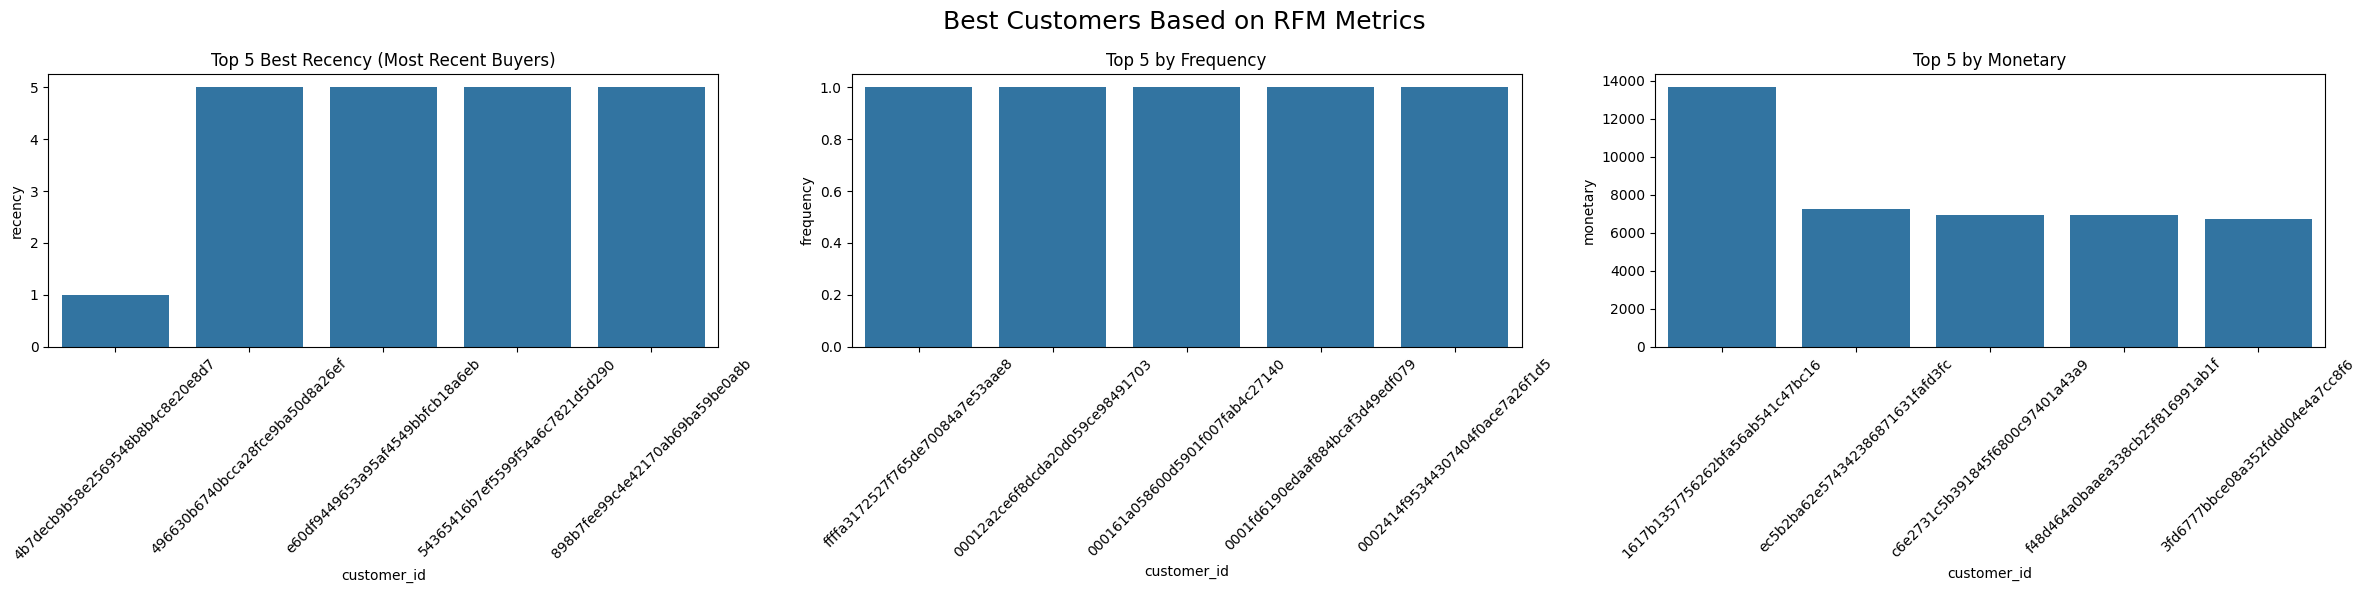

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.barplot(
    x='customer_id',
    y='recency',
    data=rfm_df.sort_values('recency').head(5),
    ax=ax[0]
)
ax[0].set_title("Top 5 Best Recency (Most Recent Buyers)")
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='customer_id',
    y='frequency',
    data=rfm_df.sort_values('frequency', ascending=False).head(5),
    ax=ax[1]
)
ax[1].set_title("Top 5 by Frequency")
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(
    x='customer_id',
    y='monetary',
    data=rfm_df.sort_values('monetary', ascending=False).head(5),
    ax=ax[2]
)
ax[2].set_title("Top 5 by Monetary")
ax[2].tick_params(axis='x', rotation=45)

plt.suptitle("Best Customers Based on RFM Metrics", fontsize=18)
plt.tight_layout()
plt.show()

In [139]:
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 5, labels=[5,4,3,2,1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 5, labels=[1,2,3,4,5])

rfm_df['R_score'] = rfm_df['R_score'].astype(int)
rfm_df['F_score'] = rfm_df['F_score'].astype(int)
rfm_df['M_score'] = rfm_df['M_score'].astype(int)

rfm_df['RFM_score'] = (
    rfm_df['R_score'] +
    rfm_df['F_score'] +
    rfm_df['M_score']
)

rfm_df.head()

,customer_id,frequency,monetary,recency,R_score,F_score,M_score,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,2,1,3,6
1,000161a058600d5901f007fab4c27140,1,67.41,414,1,1,2,4
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,1,1,4,6
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,2,1,4,7
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,4,1,3,8


In [140]:
def segment_customer(score):
    if score >= 13:
        return "Top Customers"
    elif score >= 10:
        return "High Value Customers"
    elif score >= 7:
        return "Medium Value Customers"
    elif score >= 5:
        return "Low Value Customers"
    else:
        return "Lost Customers"

rfm_df['customer_segment'] = rfm_df['RFM_score'].apply(segment_customer)

rfm_df.head()

,customer_id,frequency,monetary,recency,R_score,F_score,M_score,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,2,1,3,6,Low Value Customers
1,000161a058600d5901f007fab4c27140,1,67.41,414,1,1,2,4,Lost Customers
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,1,1,4,6,Low Value Customers
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,2,1,4,7,Medium Value Customers
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,4,1,3,8,Medium Value Customers


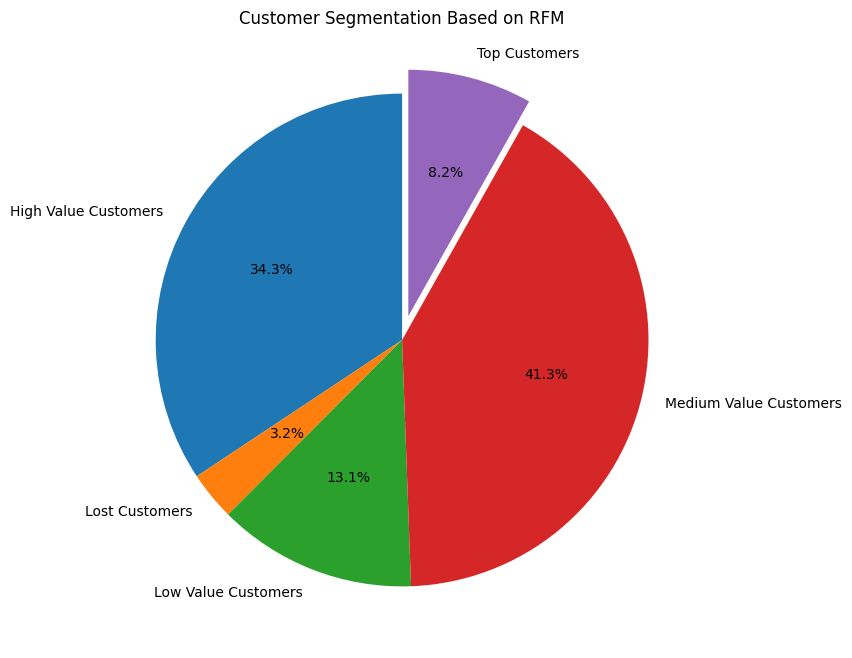

In [141]:
segment_summary = (
    rfm_df.groupby('customer_segment')['customer_id']
    .nunique()
    .reset_index()
)

explode = [0.1 if seg == "Top Customers" else 0
           for seg in segment_summary['customer_segment']]

plt.figure(figsize=(8,8))

plt.pie(
    segment_summary['customer_id'],
    labels=segment_summary['customer_segment'],
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)

plt.title("Customer Segmentation Based on RFM")
plt.show()

### Pertanyaan 2: Wilayah mana yang menghasilkan revenue terbesar dan bagaimana distribusinya?

In [142]:
state_revenue = (
    main_data
    .groupby('customer_state')
    .agg(
        total_revenue=('total_order_value', 'sum'),
        total_orders=('order_id', 'nunique')
    )
    .reset_index()
    .sort_values(by='total_revenue', ascending=False)
)

state_revenue.head()

,customer_state,total_revenue,total_orders
25,SP,5921678.12,41375
18,RJ,2129681.98,12762
10,MG,1856161.49,11544
22,RS,885826.76,5432
17,PR,800935.44,4998


In [143]:
top_state = state_revenue.iloc[0]

print("Wilayah dengan Revenue Tertinggi:")
print("State:", top_state['customer_state'])
print("Total Revenue:", top_state['total_revenue'])
print("Total Orders:", top_state['total_orders'])

Wilayah dengan Revenue Tertinggi:
State: SP
Total Revenue: 5921678.12
Total Orders: 41375


In [144]:
total_revenue_all = state_revenue['total_revenue'].sum()

state_revenue['revenue_percentage'] = (
    state_revenue['total_revenue'] / total_revenue_all * 100
)

state_revenue.head()

,customer_state,total_revenue,total_orders,revenue_percentage
25,SP,5921678.12,41375,37.375947
18,RJ,2129681.98,12762,13.441947
10,MG,1856161.49,11544,11.715563
22,RS,885826.76,5432,5.591086
17,PR,800935.44,4998,5.055277


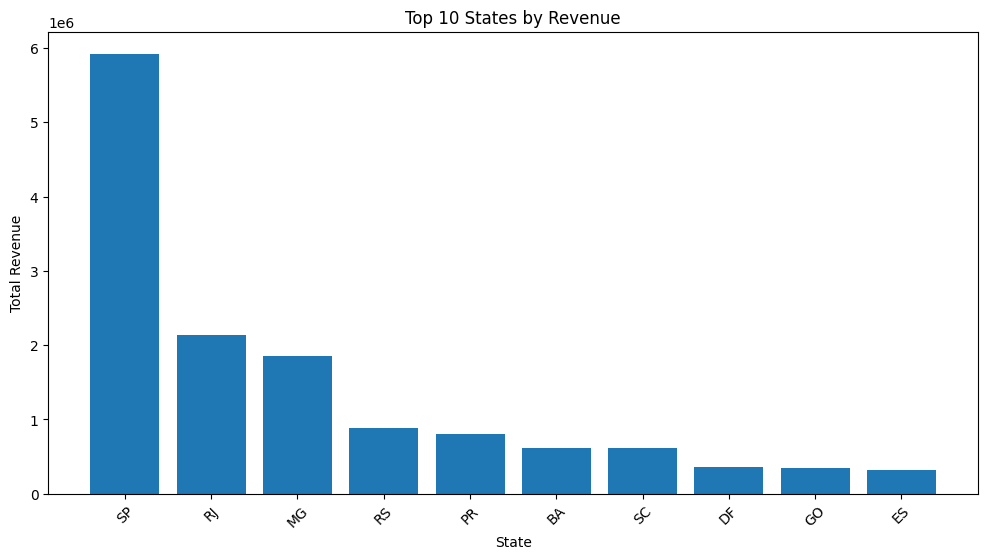

In [145]:
top_10_states = state_revenue.head(10)

plt.figure(figsize=(12,6))
plt.bar(
    top_10_states['customer_state'],
    top_10_states['total_revenue']
)

plt.title("Top 10 States by Revenue")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

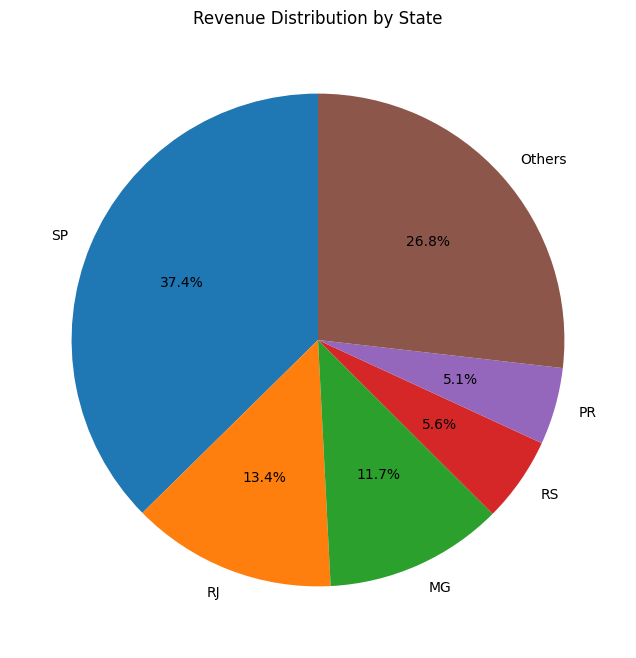

In [146]:
top_5 = state_revenue.head(5).copy()
others_revenue = state_revenue['total_revenue'][5:].sum()

top_5 = pd.concat([
    top_5,
    pd.DataFrame({
        'customer_state': ['Others'],
        'total_revenue': [others_revenue]
    })
], ignore_index=True)

plt.figure(figsize=(8,8))
plt.pie(
    top_5['total_revenue'],
    labels=top_5['customer_state'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Revenue Distribution by State")
plt.show()

In [147]:
state_revenue['avg_order_value'] = (
    state_revenue['total_revenue'] /
    state_revenue['total_orders']
)

state_revenue.sort_values(
    by='avg_order_value',
    ascending=False
).head()

,customer_state,total_revenue,total_orders,revenue_percentage,avg_order_value
14,PB,140987.81,532,0.889875,265.014680
0,AC,19669.70,81,0.124150,242.835802
3,AP,16262.80,68,0.102646,239.158824
1,AL,96229.40,411,0.607373,234.134793
20,RO,57558.02,247,0.363290,233.028421


**Insight:**
- Mayoritas pelanggan berada pada kategori Medium Value Customers, diikuti oleh High Value Customers, sementara Top Customers hanya mencakup sebagian kecil dari total pelanggan. Hal ini menunjukkan bahwa pelanggan dengan nilai sangat tinggi jumlahnya terbatas, namun berpotensi memberikan kontribusi revenue yang signifikan.
- SP menyumbang sekitar 37,38% dari total revenue, diikuti oleh RJ dan MG. Hal ini mengindikasikan bahwa lebih dari sepertiga pendapatan perusahaan berasal dari satu wilayah, sehingga terdapat konsentrasi revenue yang cukup tinggi secara geografis.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: mayoritas pelanggan hanya melakukan satu kali transaksi, yang mengindikasikan tingkat repeat purchase yang relatif rendah. Segmentasi pelanggan memperlihatkan bahwa sebagian besar berada pada kategori Medium Value Customers, sementara jumlah Top Customers relatif kecil tetapi memiliki kontribusi revenue yang signifikan. Hal ini menunjukkan pentingnya strategi retensi dan pengelolaan pelanggan bernilai tinggi untuk menjaga stabilitas pendapatan.
- Conclution pertanyaan 2: distribusi pelanggan dan revenue tidak merata. State SP menjadi kontributor terbesar dengan menyumbang sekitar 37% dari total revenue dan memiliki jumlah pesanan tertinggi. Hal ini menunjukkan adanya konsentrasi aktivitas penjualan pada wilayah tertentu. Namun, beberapa state dengan volume transaksi lebih kecil memiliki rata-rata nilai order yang lebih tinggi, yang menunjukkan potensi pasar dengan kualitas transaksi yang baik.